In [2]:
import numpy as np

### Simulation Func

In [4]:
import math
from numpy.random import randn

In [6]:
def compute_dog_data(z_var, process_var, count=1, dt=1.0):
    x, vel = 0.0, 1.0
    z_std = math.sqrt(z_var)
    p_std = math.sqrt(process_var)
    xs, zs = [], []
    for _ in range(count):
        v = vel + (randn() * p_std)
        x += v * dt
        xs.append(x)
        zs.append(x + randn() * z_std)
    return np.array(xs), np.array(zs)

### State Variables: Mean & Covariance

In [11]:
# x = np.array([[10, 4.5]]).T
x = np.array([10, 4.5])
x.shape

(2,)

In [12]:
P = np.diag([500., 49.])
P

array([[500.,   0.],
       [  0.,  49.]])

*I have no idea. As we will see the filter computes this for us, so I initialize the covariances to zero.* ???

### Process Model

1. State Transition: $ \hat{x}=x+\triangle t \dot{x},  \hat{\dot{x}} = \dot{x} $

In [16]:
dt = 0.1
F = np.array([[1, dt], [0, 1]])
F

array([[1. , 0.1],
       [0. , 1. ]])

In [20]:
from filterpy.kalman import predict

x = np.array([10.0, 4.5])
P = np.diag([500, 49])
F = np.array([[1, dt], [0, 1]])

# Q is the process noise
x, P = predict(x=x, P=P, F=F, Q=0)
print('x =', x)

x = [10.45  4.5 ]


In [21]:
for _ in range(4):
    x, P = predict(x=x, P=P, F=F, Q=0)
    print('x =', x)
P

x = [10.9  4.5]
x = [11.35  4.5 ]
x = [11.8  4.5]
x = [12.25  4.5 ]


array([[512.25,  24.5 ],
       [ 24.5 ,  49.  ]])

*We've performed five prediction steps with no measurements, and our uncertainty grew. The off-diagonal elements became non-zero - the Kalman filter detected a correlation between position and velocity!*

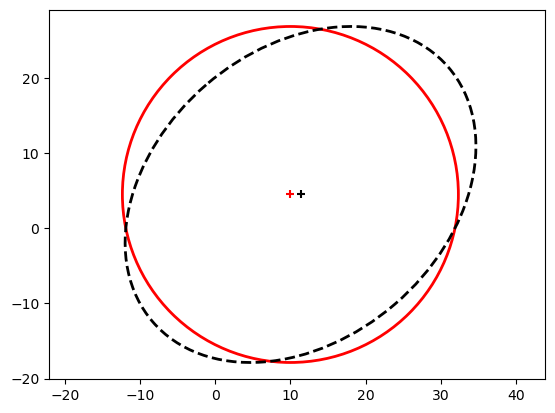

In [22]:
from filterpy.stats import plot_covariance_ellipse

dt = 0.3
F = np.array([[1, dt], [0, 1]])
x = np.array([10.0, 4.5])
P = np.diag([500, 500])
plot_covariance_ellipse(x, P, edgecolor='r')
x, P = predict(x, P, F, Q=0)
plot_covariance_ellipse(x, P, edgecolor='k', ls='dashed')